In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = pd.read_csv('/content/US_honey_dataset.csv')

In [135]:
df.head()

,Unnamed: 0,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,0,Alabama,16000,58,928000,28000,62.0,575000,1995
1,1,Arizona,52000,79,4108000,986000,68.0,2793000,1995
2,2,Arkansas,50000,60,3000000,900000,64.0,1920000,1995
3,3,California,420000,93,39060000,4687000,60.0,23436000,1995
4,4,Colorado,45000,60,2700000,1404000,68.0,1836000,1995


In [136]:
df.shape

(1115, 9)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1115 non-null   int64  
 1   state                1115 non-null   object 
 2   colonies_number      1115 non-null   int64  
 3   yield_per_colony     1115 non-null   int64  
 4   production           1115 non-null   int64  
 5   stocks               1115 non-null   int64  
 6   average_price        1115 non-null   float64
 7   value_of_production  1115 non-null   int64  
 8   year                 1115 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 78.5+ KB


In [138]:
df.isnull().sum().sum()

np.int64(0)

In [139]:
df.duplicated().sum().sum()

np.int64(0)

In [140]:
df.describe()

,Unnamed: 0,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
count,1115.00000,1115.000000,1115.000000,1.115000e+03,1.115000e+03,1115.000000,1.115000e+03,1115.000000
mean,557.00000,62438.565022,59.743498,2.851268e+06,1.172625e+06,140.623076,5.667412e+06,2007.740807
std,322.01708,92648.175955,19.940500,5.561202e+06,2.049556e+06,107.011544,9.459460e+06,7.823002
min,0.00000,2000.000000,19.000000,1.200000e+04,9.000000e+03,1.300000,1.060000e+05,1995.000000
25%,278.50000,9000.000000,45.000000,2.460000e+05,1.125000e+05,70.000000,1.008000e+06,2001.000000
50%,557.00000,26000.000000,57.000000,8.280000e+05,3.700000e+05,128.000000,2.281000e+06,2008.000000
75%,835.50000,69000.000000,71.000000,2.700000e+06,1.253500e+06,193.000000,5.704000e+06,2015.000000
max,1114.00000,550000.000000,155.000000,3.906000e+07,1.354500e+07,874.000000,8.385900e+07,2021.000000


#### Dropping unwanted columns

In [141]:
df.drop(columns= 'Unnamed: 0', axis = 1, inplace = True)

In [142]:
df

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
0,Alabama,16000,58,928000,28000,62.00,575000,1995
1,Arizona,52000,79,4108000,986000,68.00,2793000,1995
2,Arkansas,50000,60,3000000,900000,64.00,1920000,1995
3,California,420000,93,39060000,4687000,60.00,23436000,1995
4,Colorado,45000,60,2700000,1404000,68.00,1836000,1995
...,...,...,...,...,...,...,...,...
1110,Virginia,6000,40,79000,79000,8.23,1975000,2021
1111,Washington,96000,32,1206000,1206000,2.52,7741000,2021
1112,WestVirginia,6000,43,136000,136000,4.80,1238000,2021
1113,Wisconsin,42000,47,750000,750000,2.81,5547000,2021


#### Finding outliers

In [143]:
col_list = df.columns
col_list

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

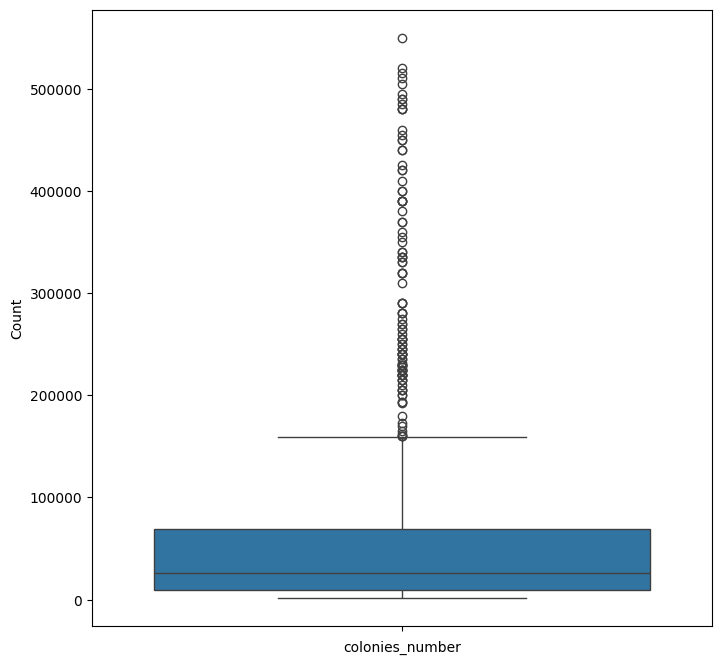

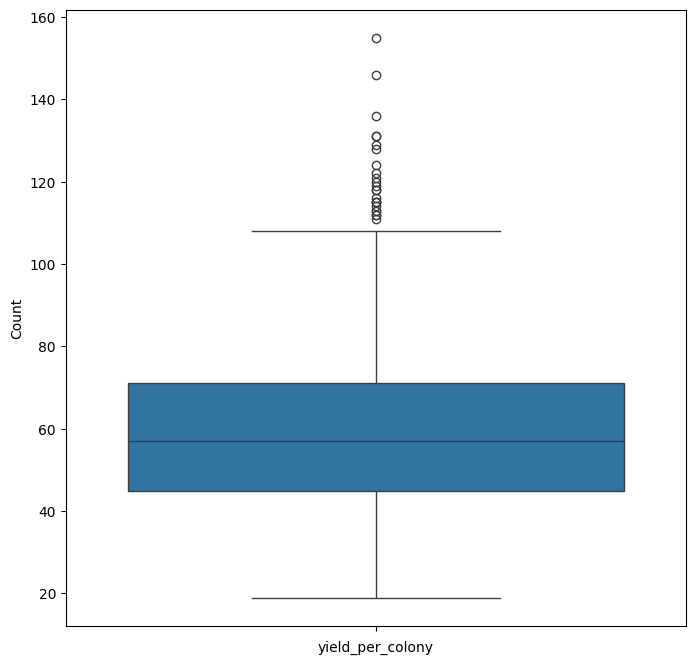

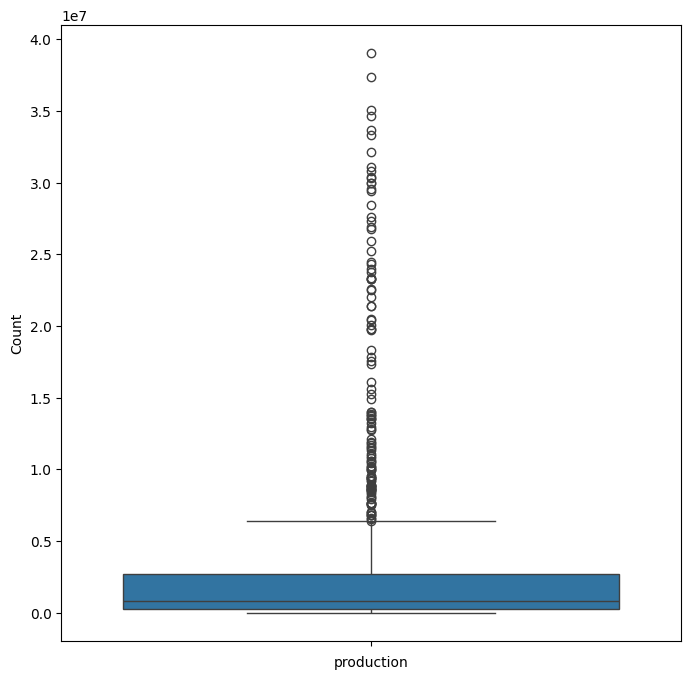

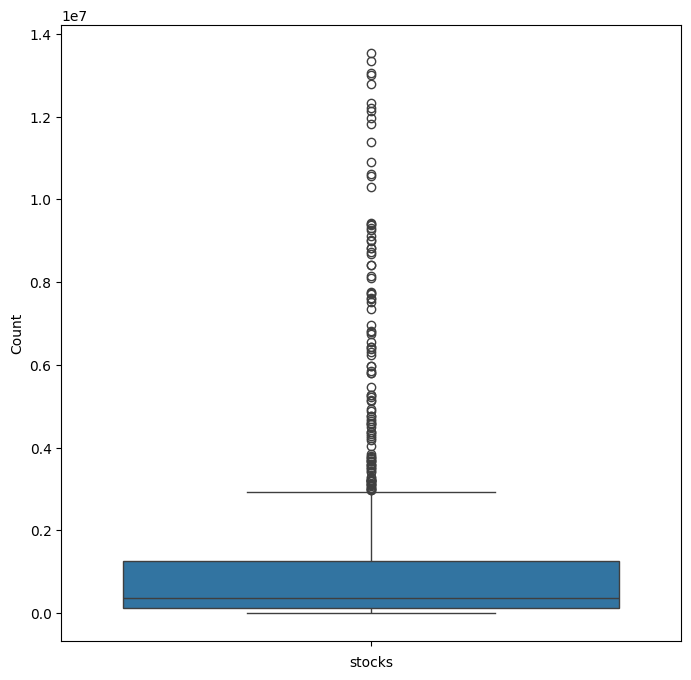

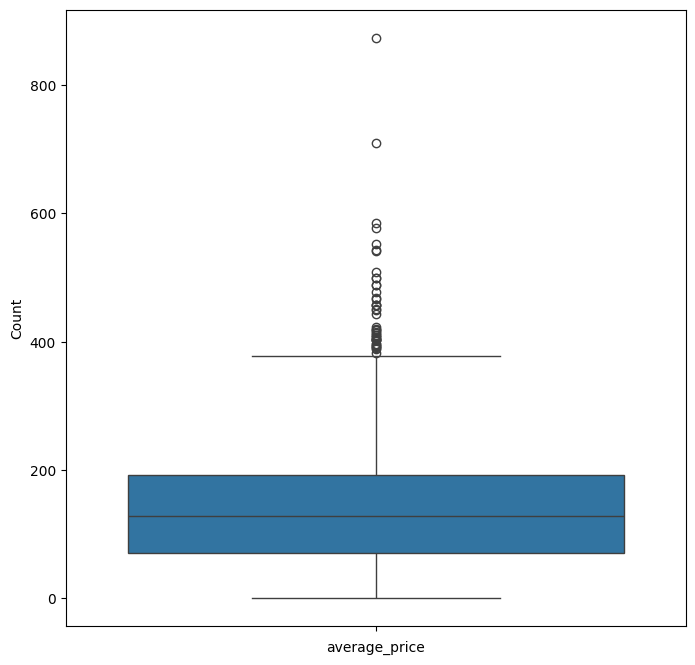

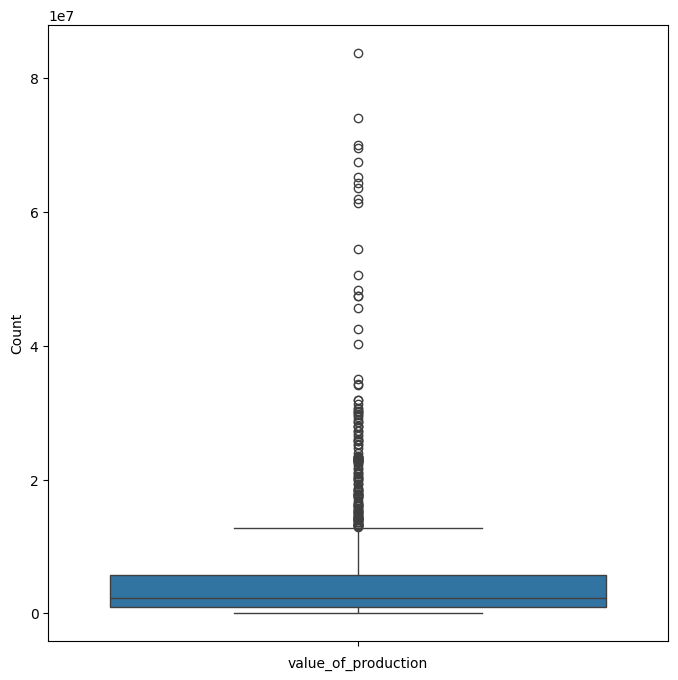

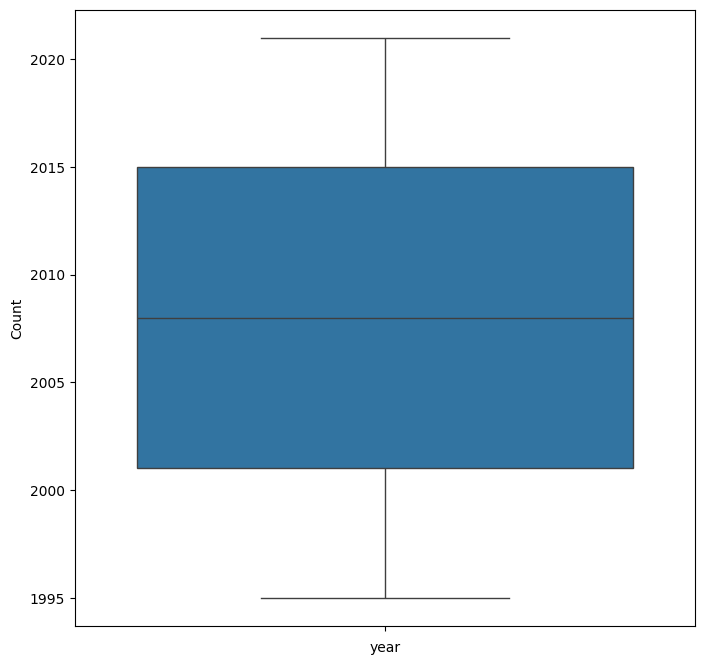

In [144]:
for col in col_list:
  if df[col].dtype != 'object':
    plt.figure(figsize = (8,8))
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [145]:
# for col in col_list:
#   if df[col].dtypes=='object':
#     continue

#   Q1 = df[col].quantile(0.25)
#   Q3 = df[col].quantile(0.75)

#   IQR = Q3-Q1   # Inter Quartile Range.
#   lower_bound = Q1 - 1.5*IQR
#   upper_bound = Q3 + 1.5*IQR
#   df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [146]:
# for col in col_list:
#   if df[col].dtype != 'object':
#     plt.figure(figsize = (8,8))
#     sns.boxplot(df[col])
#     plt.xlabel(col)
#     plt.ylabel('Count')
#     plt.show()

#### We do not remove the outliers because those outliers can be right for some states with the right climate, environment, or other conditions.

#### If you want to train a predictive model then you can remove the outliers.

In [147]:
df[['colonies_number', 'yield_per_colony', 'production', 'stocks','average_price', 'value_of_production', 'year']].corr()

,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
colonies_number,1.000000,0.201100,0.736643,0.800533,-0.165758,0.905332,0.034168
yield_per_colony,0.201100,1.000000,0.413410,0.344385,-0.187149,0.210358,-0.327413
production,0.736643,0.413410,1.000000,0.807947,-0.194206,0.520972,-0.284939
stocks,0.800533,0.344385,0.807947,1.000000,-0.173171,0.689202,-0.113179
average_price,-0.165758,-0.187149,-0.194206,-0.173171,1.000000,-0.078820,0.166894
value_of_production,0.905332,0.210358,0.520972,0.689202,-0.078820,1.000000,0.194379
year,0.034168,-0.327413,-0.284939,-0.113179,0.166894,0.194379,1.000000


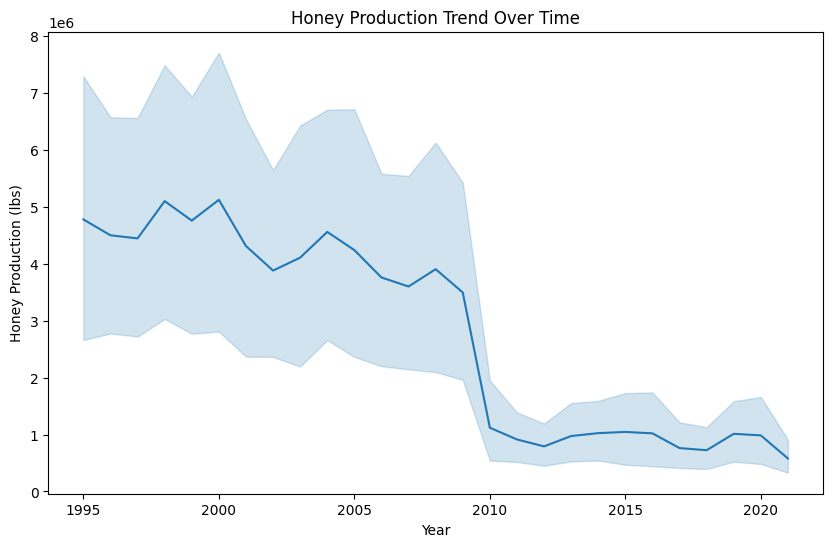

In [148]:
# 1. How has honey production in the U.S. changed over time (1995-2021)?
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='production')
plt.title('Honey Production Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Honey Production (lbs)')
plt.show()

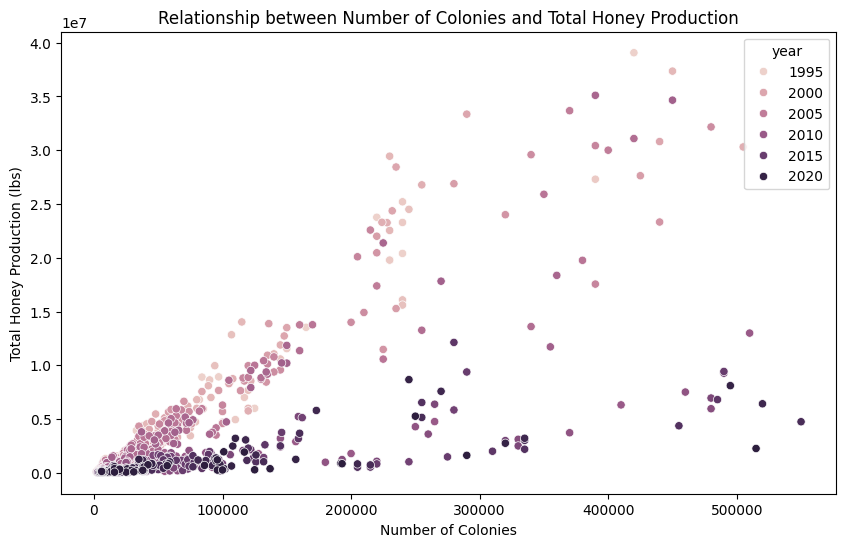


Correlation between colonies and production: 0.7366430206417045


In [149]:
# 2. What is the relationship between the number of colonies and total honey production?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='colonies_number', y='production', hue= 'year')
plt.title('Relationship between Number of Colonies and Total Honey Production')
plt.xlabel('Number of Colonies')
plt.ylabel('Total Honey Production (lbs)')
plt.show()

# correlation
correlation = df['colonies_number'].corr(df['production'])
print(f"\nCorrelation between colonies and production: {correlation}")


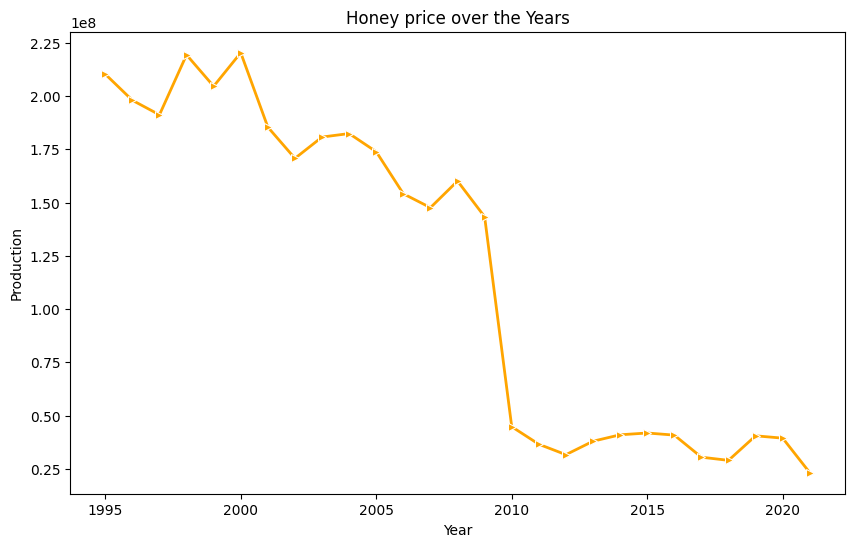

In [150]:
# 3. How do honey prices fluctuate over time, and what factors influence them?
production_trend = df.groupby("year")["production"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data = production_trend, x = 'year', y ='production', marker=">", linewidth=2, color="orange")
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Honey price over the Years')
plt.show()

#### Trend: Honey production in the U.S has generally decreased over years(2007 - 2020).

#### Fluctuations: Some years show a slight increase, but the overall pattern suggests a downward trajectory.

#### Reasons: This decline could be due to factors like colony collapse disorder, climate changes, or decrease in beekeeping practices.

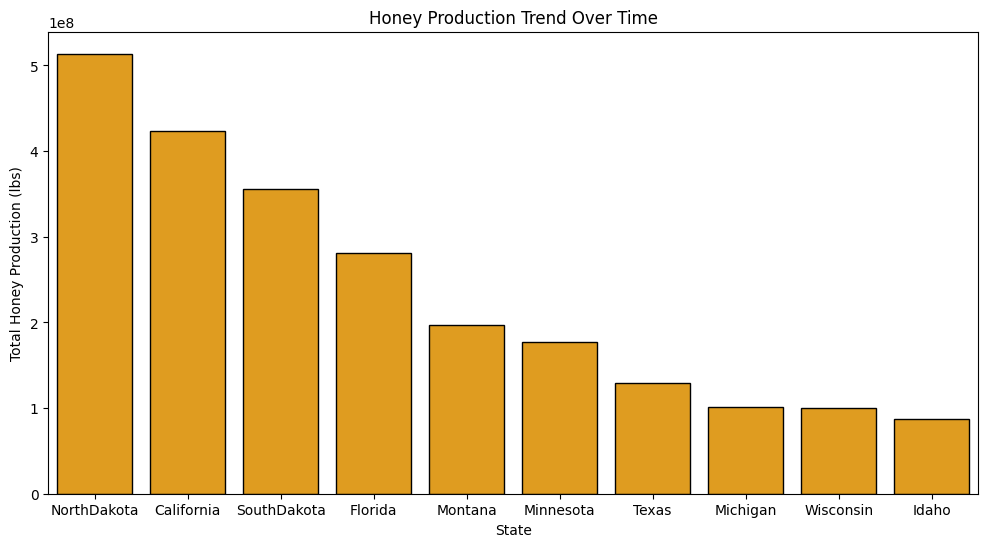

In [151]:
# 4. Which states are the largest honey producers, and how have their production trends evolved?
state_production = df.groupby('state')['production'].sum().reset_index().sort_values('production', ascending = False)
top_producers = state_production.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data= top_producers, x='state', y='production', color='orange', edgecolor = 'black')
plt.title('Honey Production Trend Over Time')
plt.xlabel('State')
plt.ylabel('Total Honey Production (lbs)')
plt.show()

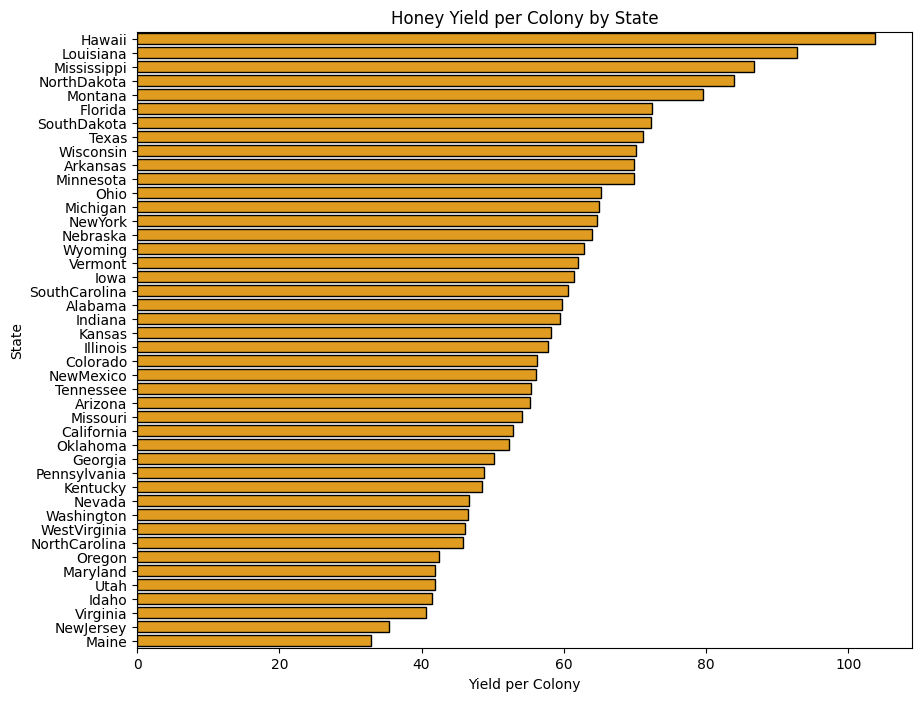

In [152]:
# 5. How does geographic location influence honey yield per colony?
yield_group = df.groupby('state')['yield_per_colony'].mean().sort_values(ascending = False).reset_index()

plt.figure(figsize=(10,8))

sns.barplot(data= yield_group, x='yield_per_colony', y='state', color='orange', edgecolor= 'black')
plt.title('Honey Yield per Colony by State')
plt.xlabel('Yield per Colony')
plt.ylabel('State')

plt.show()

#### The bar chart of average honey yield per colony by state shows significant geographic variation. States like Hawaii, Louisiana, and North Dakota exhibit the highest yields per colony, surpassing 100 lbs/colony. These states benefit from favorable climates and agricultural practices tailored to honey production.

#### states such as Maine, New Jersey, and Maryland have much lower yields (below 50 lbs/colony), likely due to less favorable environmental conditions or small scale operations.

In [153]:
df.columns

Index(['state', 'colonies_number', 'yield_per_colony', 'production', 'stocks',
       'average_price', 'value_of_production', 'year'],
      dtype='object')

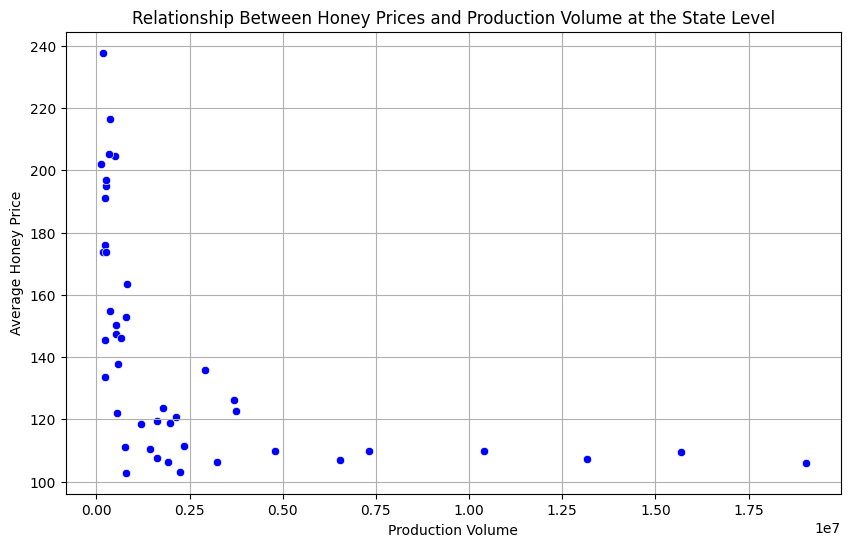

In [154]:
 # 6. Relationship Between Honey Prices and Production Volume at the State Level
state_production = df.groupby('state')['production'].mean()
state_avg_price = df.groupby('state')['average_price'].mean()

data_1 = pd.merge(state_production, state_avg_price, on='state')

plt.figure(figsize=(10, 6))

sns.scatterplot(data=data_1, x= 'production', y= 'average_price', color= 'blue')
plt.title('Relationship Between Honey Prices and Production Volume at the State Level')
plt.xlabel('Production Volume')
plt.ylabel('Average Honey Price')
plt.grid(True)

plt.show()

#### As we can see from the scatter plot that states with lower production volumes often command higher prices. Reflecting a scarcity premium. This dynamic suggests that limited supply can drive up prices in certain markets.

In [155]:
# 7. What drives the economic value of honey production? Is it quantity, price, or both?

# Calculate the correlation between 'value_of_production', 'production', and 'average_price'
correlation_matrix = df[['value_of_production', 'production', 'average_price']].corr()
correlation_matrix


,value_of_production,production,average_price
value_of_production,1.000000,0.520972,-0.078820
production,0.520972,1.000000,-0.194206
average_price,-0.078820,-0.194206,1.000000


#### As we can see the correlation It suggests a moderate positive correlation between value of production and production itself. And a weak negative correlation between value of production and average price.